# Telco Customer Churn

##### Context
"Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs." [IBM Sample Data Sets]

##### Content
Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The data set includes information about:

* Customers who left within the last month – the column is called Churn
* Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
* Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
* Demographic info about customers – gender, age range, and if they have partners and dependents

##### Inspiration
* To explore this type of models and learn more about the subject.


### Import Libraries

In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
import pickle
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

### Load Data

In [142]:
# Load Churn Data
data = pd.read_csv('customer_churn.csv')


In [143]:
data.head(100)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,8637-XJIVR,Female,0,No,No,12,Yes,Yes,Fiber optic,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,78.95,927.35,Yes
96,9803-FTJCG,Male,0,Yes,Yes,71,Yes,Yes,DSL,Yes,...,No,Yes,No,No,One year,Yes,Credit card (automatic),66.85,4748.7,No
97,0278-YXOOG,Male,0,No,No,5,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,21.05,113.85,Yes
98,3212-KXOCR,Male,0,No,No,52,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),21.00,1107.2,No


### Data Exploration & Cleaning 

In [144]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [145]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [146]:
# set all null total charges to zero
data.TotalCharges[data.tenure==0] = 0

C:\Users\pc\AppData\Local\Temp\ipykernel_9696\258562714.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.TotalCharges[data.tenure==0] = 0


In [147]:
# Conver Datatype
data.TotalCharges =data.TotalCharges.astype('float')


In [148]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [149]:
data.drop('customerID', inplace=True, axis=1)


In [150]:
data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

##### Stage Report
* No missing value in datasets 
* The Total Charges column is in the wrong datatype because some of the columns consist of empty string this is as a result of users that has their tenure = 0 i.e they haven't use upto a month with the company and we fix this by setting the total charges to 0
* Convert Senior itizen column to type category not int
* Drop Unnecessary Columns (Customer Id)

### Data Visualization

#### Univariate Analysis

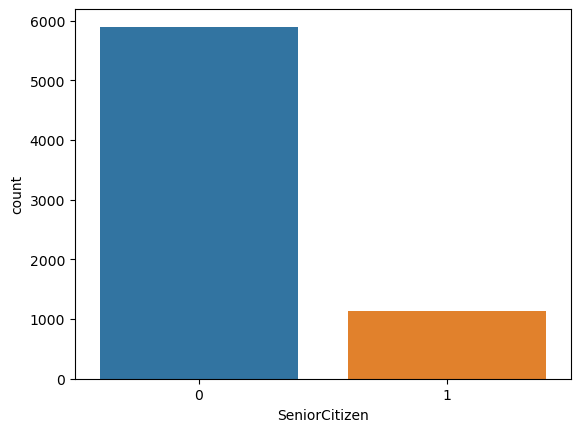

In [151]:
# Senior Citizen

sns.countplot(data=data, x='SeniorCitizen')
plt.show()

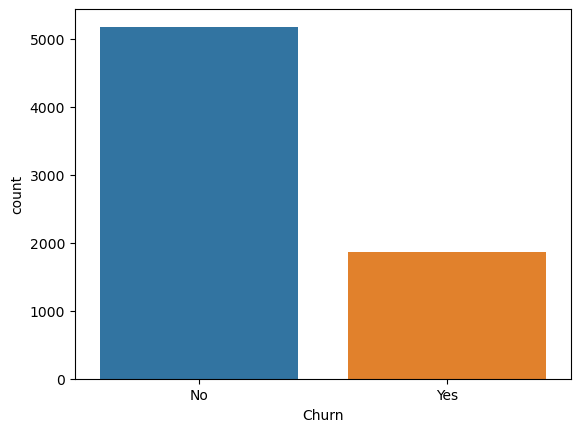

In [152]:
# Churn Count Plot

sns.countplot(data=data, x='Churn')
plt.show()

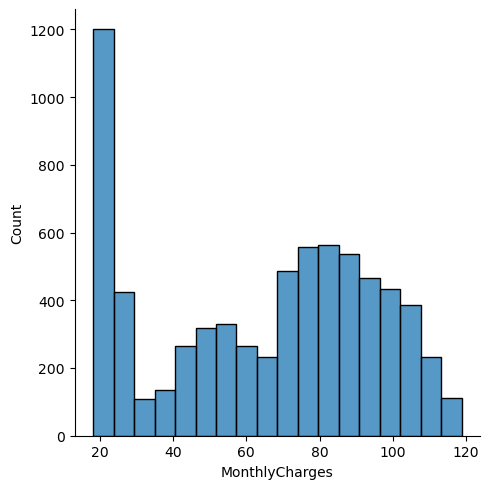

In [153]:
# Histogram of the Monthly Charges 

sns.displot(data=data, x='MonthlyCharges')
plt.show()

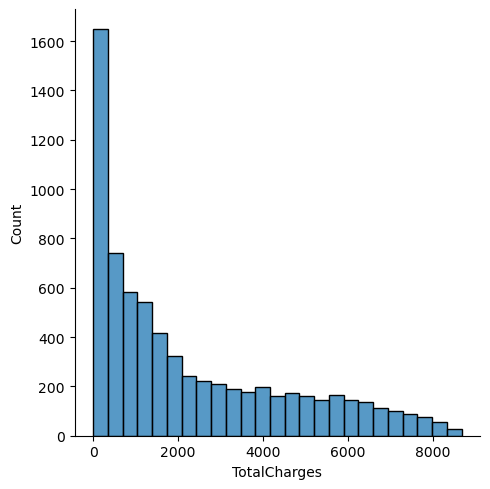

In [154]:
# Histogram distribution of the Total Charges
sns.displot(data=data, x='TotalCharges')
plt.show()

* Few of the customers are senior citizen i.e majority are working class
* Both the monthly charges and the total charges are not normally distributed therefore there might be a need for log transformation

#### Bivariate Analysis

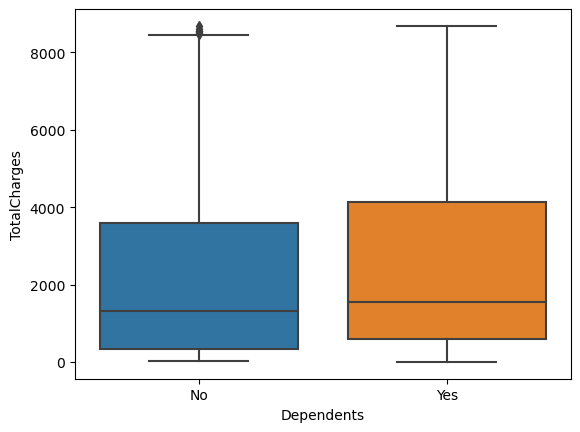

In [155]:
# Dependents Vs TotalCharges
sns.boxplot(data=data, x='Dependents',y='TotalCharges')
plt.show()

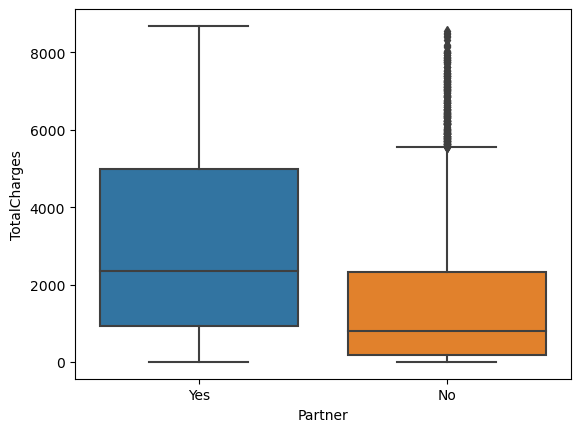

In [156]:
# Partner Vs TotalCharges
sns.boxplot(data=data, x='Partner',y='TotalCharges')
plt.show()

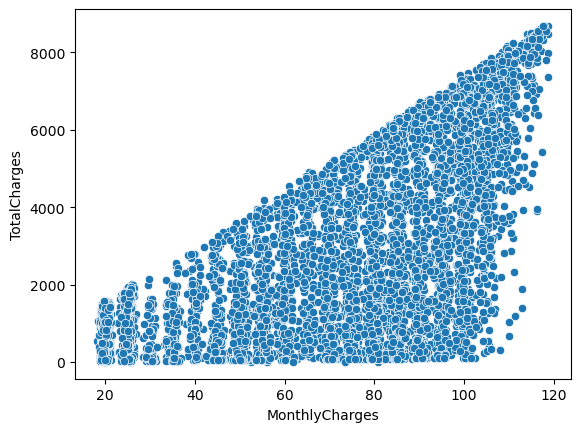

In [157]:
# Monthly Charges vs TotalCharges

sns.scatterplot(data=data, x='MonthlyCharges', y='TotalCharges')
plt.show()

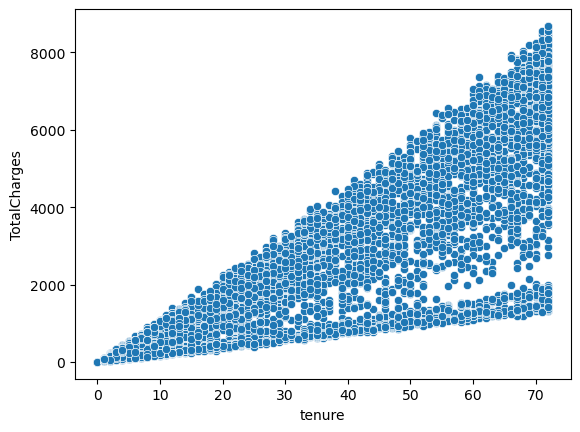

In [158]:
# Tenure vs TotalCharges
sns.scatterplot(data=data, x='tenure', y='TotalCharges')
plt.show()

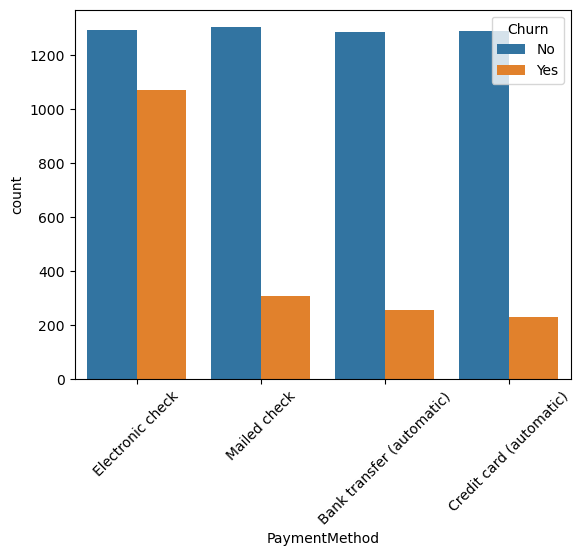

In [159]:
# Payment Method and Churn
sns.countplot(data=data, x='PaymentMethod',hue='Churn')
plt.xticks(rotation=45)
plt.show()

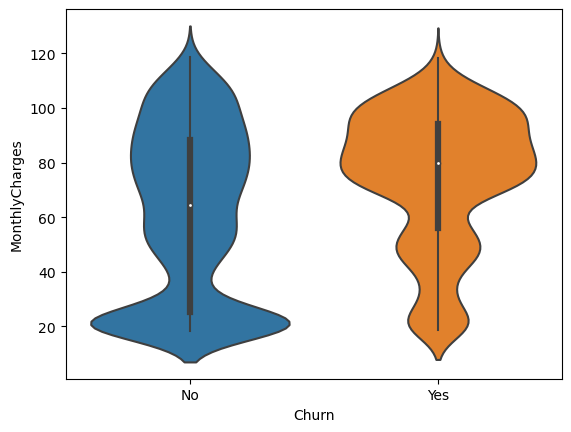

In [160]:
# Partner Vs TotalCharges
sns.violinplot(data=data, x='Churn',y='MonthlyCharges')
plt.show()

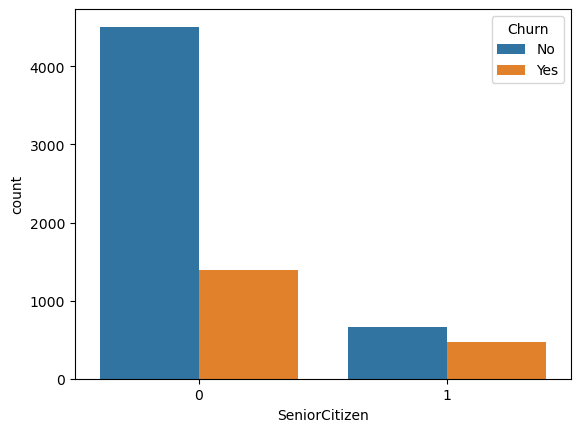

In [161]:
# SeniorCitizen Vs Churn
sns.countplot(data=data, x='SeniorCitizen',hue='Churn')
plt.show()

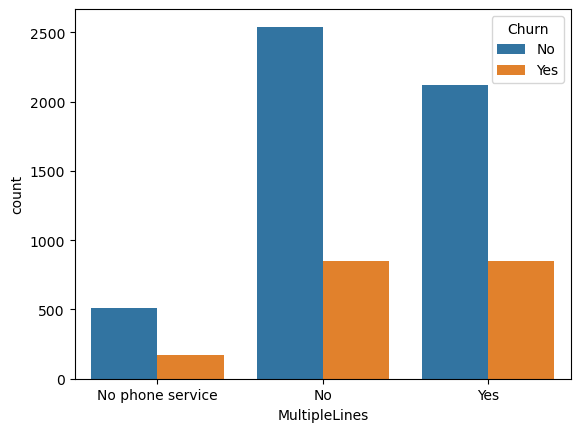

In [162]:
# MultipleLines Vs Churn

sns.countplot(data=data, x='MultipleLines',hue='Churn')
plt.show()

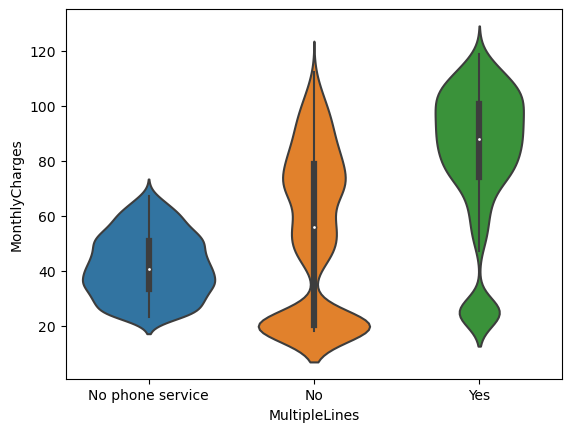

In [163]:
# Partner Vs TotalCharges
sns.violinplot(data=data, x='MultipleLines',y='MonthlyCharges')
plt.show()

###### Insights

* Those with dependents tends to pay a bit higher charges in total than those without dependent
* Those With Partner spend far higher than thopse without partner, most of those with partners tends to share subscription with their partners which warrant for the exhorbitant difference in charges among those with partners and those without
* There's a great correlation between the tenure(How long customer has been using the service) and their total charges also between the monthlycharges and total charges with obvious reasons.
* Customers that uses electronic check as their means of payment tends to leave more frequently than others there moght seems to be an issue between our system and the electronic check payment method that seems to discourage users
* Customers with higher monthly charges tends to churn more frequent this can be as a result of them feeling cheated or they feel the charges is too exhorbitant
* On percentage rate senior citizen tends to churn more frequent
* Either a customer churn or not really has nothing to do with the Multiple lines service
* Using Multiple Lines attracts more charges which is an obvious observation

### Data Preprocessing

In [164]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


##### Data Encoding

* Most of the datas are categorical and they are in object datatype we have to encode the datas to numerical value
* The columns with 2 unique value will be encoded using dummy variable and drop the first column

In [165]:
# Check for columns with 2 values

columns_2_unique_value= []
other_columns = []

allColumns =list(data.columns)

for column in allColumns:
    if (column == 'TotalCharges' or column == 'MonthlyCharges' or column == 'tenure' or column == 'SeniorCitizen'):
        pass
        
    else:

        if data[column].nunique() == 2:
            columns_2_unique_value.append(column)

        else:
            other_columns.append(column)
        
    

In [166]:
other_columns

['MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaymentMethod']

In [167]:
# Encode the columns with 2 unique values Using dummies
columns_2_df = pd.get_dummies(data[columns_2_unique_value],drop_first=True)

In [168]:
#Create Dictionary for variable

encoding_dict = {}

for col in columns_2_unique_value:
    encoding_dict[col] = {1:'Yes',0:'No'}
    

In [169]:
#Encoding categorical with more than 2 variables

le = LabelEncoder() #Initialize Encoder


for column in other_columns:
    encoded = le.fit_transform(data[column])
    data.drop(column, axis=1, inplace=True)
    data[column] = encoded
    feature_dict = dict(zip(range(len(le.classes_)), le.classes_))
    encoding_dict[column] = feature_dict


In [170]:
encoding_dict

{'gender': {1: 'Yes', 0: 'No'},
 'Partner': {1: 'Yes', 0: 'No'},
 'Dependents': {1: 'Yes', 0: 'No'},
 'PhoneService': {1: 'Yes', 0: 'No'},
 'PaperlessBilling': {1: 'Yes', 0: 'No'},
 'Churn': {1: 'Yes', 0: 'No'},
 'MultipleLines': {0: 'No', 1: 'No phone service', 2: 'Yes'},
 'InternetService': {0: 'DSL', 1: 'Fiber optic', 2: 'No'},
 'OnlineSecurity': {0: 'No', 1: 'No internet service', 2: 'Yes'},
 'OnlineBackup': {0: 'No', 1: 'No internet service', 2: 'Yes'},
 'DeviceProtection': {0: 'No', 1: 'No internet service', 2: 'Yes'},
 'TechSupport': {0: 'No', 1: 'No internet service', 2: 'Yes'},
 'StreamingTV': {0: 'No', 1: 'No internet service', 2: 'Yes'},
 'StreamingMovies': {0: 'No', 1: 'No internet service', 2: 'Yes'},
 'Contract': {0: 'Month-to-month', 1: 'One year', 2: 'Two year'},
 'PaymentMethod': {0: 'Bank transfer (automatic)',
  1: 'Credit card (automatic)',
  2: 'Electronic check',
  3: 'Mailed check'}}

In [171]:
main_data = pd.concat([data,columns_2_df],axis=1)
main_data.drop(columns_2_unique_value,inplace=True,axis=1)

### Feature Selection

In [172]:
main_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   SeniorCitizen         7043 non-null   int64  
 1   tenure                7043 non-null   int64  
 2   MonthlyCharges        7043 non-null   float64
 3   TotalCharges          7043 non-null   float64
 4   MultipleLines         7043 non-null   int32  
 5   InternetService       7043 non-null   int32  
 6   OnlineSecurity        7043 non-null   int32  
 7   OnlineBackup          7043 non-null   int32  
 8   DeviceProtection      7043 non-null   int32  
 9   TechSupport           7043 non-null   int32  
 10  StreamingTV           7043 non-null   int32  
 11  StreamingMovies       7043 non-null   int32  
 12  Contract              7043 non-null   int32  
 13  PaymentMethod         7043 non-null   int32  
 14  gender_Male           7043 non-null   uint8  
 15  Partner_Yes          

In [173]:
main_data.corr()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,PaperlessBilling_Yes,Churn_Yes
SeniorCitizen,1.000000,0.016567,0.220173,0.103006,0.146185,-0.032310,-0.128221,-0.013632,-0.021398,-0.151268,0.030776,0.047266,-0.142554,-0.038551,-0.001874,0.016479,-0.211185,0.008576,0.156530,0.150889
tenure,0.016567,1.000000,0.247900,0.826178,0.343032,-0.030359,0.325468,0.370876,0.371105,0.322942,0.289373,0.296866,0.671607,-0.370436,0.005106,0.379697,0.159712,0.008448,0.006152,-0.352229
MonthlyCharges,0.220173,0.247900,1.000000,0.651174,0.433576,-0.323260,-0.053878,0.119777,0.163652,-0.008682,0.336706,0.335459,-0.074195,-0.193407,-0.014569,0.096848,-0.113890,0.247398,0.352150,0.193356
TotalCharges,0.103006,0.826178,0.651174,1.000000,0.452577,-0.175755,0.253224,0.374410,0.387897,0.275625,0.391470,0.398066,0.446855,-0.330918,-0.000080,0.317504,0.062078,0.113214,0.158574,-0.198324
MultipleLines,0.146185,0.343032,0.433576,0.452577,1.000000,-0.109216,0.007141,0.117327,0.122318,0.011466,0.175059,0.180957,0.110842,-0.176793,-0.006739,0.142410,-0.024991,-0.020538,0.165146,0.038037
InternetService,-0.032310,-0.030359,-0.323260,-0.175755,-0.109216,1.000000,-0.028416,0.036138,0.044944,-0.026047,0.107417,0.098350,0.099721,0.086140,-0.000863,0.000891,0.044590,0.387436,-0.138625,-0.047291
OnlineSecurity,-0.128221,0.325468,-0.053878,0.253224,0.007141,-0.028416,1.000000,0.185126,0.175985,0.285028,0.044669,0.055954,0.374416,-0.096726,-0.015017,0.150828,0.152166,-0.015198,-0.157641,-0.289309
OnlineBackup,-0.013632,0.370876,0.119777,0.374410,0.117327,0.036138,0.185126,1.000000,0.187757,0.195748,0.147186,0.136722,0.280980,-0.124847,-0.012057,0.153130,0.091015,0.024105,-0.013370,-0.195525
DeviceProtection,-0.021398,0.371105,0.163652,0.387897,0.122318,0.044944,0.175985,0.187757,1.000000,0.240593,0.276652,0.288799,0.350277,-0.135750,0.000549,0.166330,0.080537,0.003727,-0.038234,-0.178134
TechSupport,-0.151268,0.322942,-0.008682,0.275625,0.011466,-0.026047,0.285028,0.195748,0.240593,1.000000,0.161305,0.161316,0.425367,-0.104670,-0.006825,0.126733,0.133524,-0.019158,-0.113600,-0.282492


In [174]:
main_data.Churn_Yes.value_counts()

0    5174
1    1869
Name: Churn_Yes, dtype: int64

In [175]:

# Separate majority and minority class
majority_class = main_data[main_data['Churn_Yes'] == 0]
minority_class = main_data[main_data['Churn_Yes'] == 1]

# Undersample majority class
undersampled_majority = resample(majority_class,
                                replace=False,  # Set to False for undersampling
                                n_samples=len(minority_class) + 200,  # Match minority class size
                                random_state=1)  # Set a random seed for reproducibility

# Combine the undersampled majority class with the minority class
undersampled_data = pd.concat([undersampled_majority, minority_class])



### Feature Scaling

In [176]:
#Feature Scaling

y = undersampled_data.Churn_Yes
x = undersampled_data.drop('Churn_Yes', axis = 1)

scaler = StandardScaler()

columns_names = x.columns


In [177]:
len(x)

3938

In [178]:
x = scaler.fit_transform(x)

In [179]:

scaled_features = pd.DataFrame(x, columns=columns_names)

In [180]:
w = scaled_features[:1]

### Model Building

In [181]:
#Split Features

X_train, X_test, y_train, y_test = train_test_split(scaled_features,y, test_size=0.3, random_state=1)

In [182]:
#Model Building

logistic_model = LogisticRegression()
randomforest_model = RandomForestClassifier()
gradBoost_model = GradientBoostingClassifier(learning_rate=0.1,min_samples_split=500,min_samples_leaf=50,max_depth=8,max_features='sqrt',subsample=0.8,random_state=10)

In [183]:
#Train Logistic Regression model

logistic_model.fit(X_train,y_train)

LogisticRegression()

In [184]:
#Train Random Forest Classifier model

randomforest_model.fit(X_train,y_train)

RandomForestClassifier()

In [185]:
#Train GRadient Boost Classifier model

gradBoost_model.fit(X_train,y_train)

GradientBoostingClassifier(max_depth=8, max_features='sqrt',
                           min_samples_leaf=50, min_samples_split=500,
                           random_state=10, subsample=0.8)

In [186]:
models = [logistic_model,randomforest_model,gradBoost_model]

### Model Evaluation

In [187]:
def evaluate(model:list) -> None:
    """
    return: Print out the evaluation summar of a model
    """
    prediction = model.predict(X_test)
    print('The accuracy is = ',accuracy_score(y_test,prediction))
    print('The precision score is = ',precision_score(y_test,prediction))
    print('The Recall Score is = ',recall_score(y_test, prediction))
    print('The F1 score is = ', f1_score(y_test, prediction))
    print('The Classification Report is = ',classification_report(y_test,prediction))
    print('The Confusion matrix',confusion_matrix(y_test, prediction))
    

In [188]:
for model in models:
    evaluate(model)

The accuracy is =  0.7741116751269036
The precision score is =  0.7297297297297297
The Recall Score is =  0.8014842300556586
The F1 score is =  0.7639257294429709
The Classification Report is =                precision    recall  f1-score   support

           0       0.82      0.75      0.78       643
           1       0.73      0.80      0.76       539

    accuracy                           0.77      1182
   macro avg       0.77      0.78      0.77      1182
weighted avg       0.78      0.77      0.77      1182

The Confusion matrix [[483 160]
 [107 432]]
The accuracy is =  0.7639593908629442
The precision score is =  0.7233676975945017
The Recall Score is =  0.7810760667903525
The F1 score is =  0.751115075825156
The Classification Report is =                precision    recall  f1-score   support

           0       0.80      0.75      0.78       643
           1       0.72      0.78      0.75       539

    accuracy                           0.76      1182
   macro avg       0.7

### HyperParameter Tuning

In [189]:

param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'saga']
}
param_grid_gradient = {'max_depth':range(5,16,2),'min_samples_split':range(200,1001,200)}


# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=logistic_model, param_grid=param_grid, cv=5)
grid_search1 = GridSearchCV(estimator=gradBoost_model, param_grid=param_grid_gradient, cv=5)

grid_search.fit(X_train, y_train)
grid_search1.fit(X_train, y_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

best_params1 = grid_search1.best_params_
best_model1 = grid_search1.best_estimator_


In [190]:
evaluate(grid_search)

The accuracy is =  0.7673434856175972
The precision score is =  0.7222222222222222
The Recall Score is =  0.7959183673469388
The F1 score is =  0.7572815533980582
The Classification Report is =                precision    recall  f1-score   support

           0       0.81      0.74      0.78       643
           1       0.72      0.80      0.76       539

    accuracy                           0.77      1182
   macro avg       0.77      0.77      0.77      1182
weighted avg       0.77      0.77      0.77      1182

The Confusion matrix [[478 165]
 [110 429]]


### Selecting Best Model

In [191]:
main_model = best_model

### Save Model and Other Objects

In [192]:

# Save model
with open('churn_classifier.pkl', 'wb') as f:
    
    pickle.dump(main_model,f)

In [193]:
# Save scaler
with open('feature_scaler.pkl', 'wb') as f:
    
    pickle.dump(scaler,f)

In [194]:
# Save Encoding Dictionary
with open('encoding_dictionary.pkl', 'wb') as f:
    
    pickle.dump(encoding_dict,f)